In [1]:
import fitz
import numpy as np
import io
from pathlib import Path
from IPython.display import display
from PIL import Image

In [20]:
def extract_pdf_pages_data(pdf_path):
  """
  Extract text and images from all pages of a PDF.

  Returns:
      [
        {
          "text": str,
          "images": [PIL.Image.Image, ...]
        },
        ...
      ]
  """
  pdf_path = Path(pdf_path)
  doc = fitz.open(pdf_path)

  pages_data = []

  for page_index in range(doc.page_count):
    page = doc.load_page(page_index)

    # ---- TEXT ----
    text = page.get_text()

    # ---- IMAGES ----
    _images_for_sorting = []

    for img in page.get_images(full=True):
      xref = img[0]
      img_name = img[7]

      bbox = page.get_image_bbox(img_name)
      y0, x0 = bbox.y0, bbox.x0

      pix = fitz.Pixmap(doc, xref)

      # Ensure RGB (PNG-safe)
      if pix.colorspace is None or pix.colorspace.n != 3:
        pix = fitz.Pixmap(fitz.csRGB, pix)

      pil_img = Image.open(io.BytesIO(pix.tobytes("png")))

      _images_for_sorting.append((y0, x0, pil_img))

      pix = None

    # Sort visually
    images = [img for _, _, img in sorted(_images_for_sorting)]

    pages_data.append({
        "text": text,
        "images": images
    })

  doc.close()
  return pages_data

In [21]:
import random


def print_pdf_pages_data(pdf_path):
  """
  Print text and display images for 2 randomly sampled pages.
  """
  pages = extract_pdf_pages_data(pdf_path)

  if not pages:
    print("[No pages found]")
    return

  sample_size = min(2, len(pages))
  sampled_pages = random.sample(list(enumerate(pages)), sample_size)

  for idx, page in sampled_pages:
    print("\n" + "=" * 80)
    print(f"PAGE {idx + 1}")
    print("=" * 80)

    print("\n--- TEXT ---")
    print(page["text"] if page["text"].strip() else "[No extractable text]")

    print("\n--- IMAGES ---")
    if not page["images"]:
      print("[No images]")
    else:
      for j, img in enumerate(page["images"], start=1):
        print(f"Image {j}")
        display(img)


PAGE 78

--- TEXT ---
78
Radha Krishna
amYm {H«$îZm
All Designs Are Available in Customizd Size
6614
6619
6622
6626
6635
6637
ART
POSTER


--- IMAGES ---
Image 1


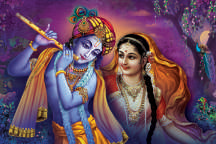

Image 2


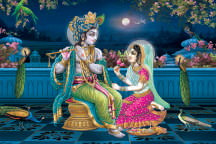

Image 3


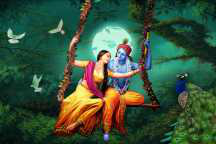

Image 4


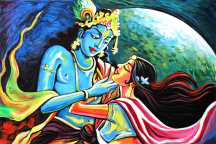

Image 5


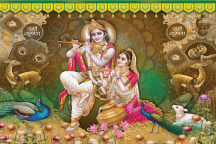

Image 6


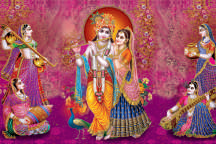


PAGE 33

--- TEXT ---
33
Radha Krishna
amYm {H«$îZm
All Designs Are Available in Customizd Size
6499
6501
6505
6508
6517
6519
ART
POSTER


--- IMAGES ---
Image 1


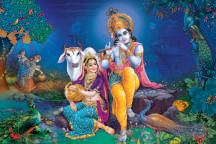

Image 2


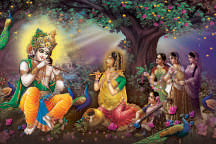

Image 3


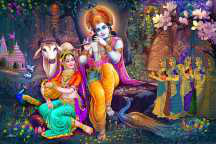

Image 4


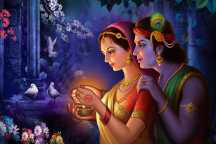

Image 5


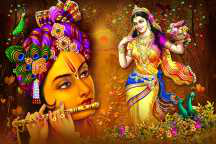

Image 6


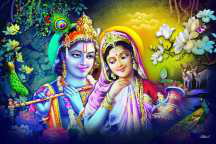

In [22]:
print_pdf_pages_data("data/poster-pdfs/multi-per-page/01_Radha_Krishna_Art_Poster.pdf")